# Feature Selection

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

To do a feature selection we have to 5 ways to do:

**I. Filter methods**

**II. Tree Methods**

**III. Wrapper Methods**

**IV. Embedded Methods**

**V. Train and Select**

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(seed = 0)

In [3]:
n = 5
m = 1_000

In [4]:
X_mc, y_mc = make_classification(
    n_samples = m, n_features = n + 5, n_informative = n, n_redundant = 5,
    n_repeated = 0, n_classes = 2, random_state=0
)

In [5]:
X = pd.DataFrame()

for i in range(n + 5):
    X[f'var_{i}'] = X_mc[:, i]

y = pd.Series(y_mc)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, random_state = 42, stratify = y)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, random_state = 42, stratify = y_val)

In [8]:
mean_X = X_train.mean()
std_X = X_train.std()

In [9]:
X_train = (X_train - mean_X)/std_X
X_val = (X_val - mean_X)/std_X
X_test = (X_test - mean_X)/std_X

# I. Filter Methods

**1. Numerical with Numerical:** 

i. Pearson Correlation.

ii. Spearman Correlation.

iii. Variance Inflation Factor. 

$ \ $ 

**2. Categorial with Categorical:**

i. Chi-Squared Test.

ii. Mutual Information.

$ \ $ 

**3. Continous with Categorical:**

i. ANOVA. 

$ \ $

**Note:** To board this situation we can use alternatives ways like:

a. Encode the categorical variable and then use numerical/numerical measures.

b. Discretice the numerical variable and then use categorical/categorical measures.


### Comments 

Preferably we have to use this methods to eliminate features very relationated and not to select variables. To select variables preferably use the nexts ways.

To see more about this methods see the folder: 

**General_Topics > 01.Relation_Type_Features**

# II. Three Methods

## 1. Trees

Here we train a Decision Tree and choose the more important variables.

In [10]:
 from sklearn import tree

In [11]:
clf = tree.DecisionTreeClassifier(random_state = 0)

In [12]:
clf = clf.fit(X_train, y_train)

In [13]:
fi = pd.DataFrame(zip(clf.feature_names_in_, clf.feature_importances_))
fi = fi.rename(columns = {0: 'variable', 1: 'importance'})
fi['importance'] = round(fi['importance']*100, 2)
fi = fi.sort_values(by = ['importance'], ascending = False)

In [14]:
fi[0: n]

,variable,importance
7,var_7,61.36
3,var_3,11.94
5,var_5,10.75
0,var_0,5.30
1,var_1,4.01


In [15]:
tree_var = list(fi[0: n]['variable'])
tree_var.sort()

In [16]:
tree_var

['var_0', 'var_1', 'var_3', 'var_5', 'var_7']

## 2. Random Forest

Here we train a Random Forest and choose the more important variables.

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
clf = RandomForestClassifier(random_state = 0)

In [19]:
clf = clf.fit(X_train, y_train)

In [20]:
fi = pd.DataFrame(zip(clf.feature_names_in_, clf.feature_importances_))
fi = fi.rename(columns = {0: 'variable', 1: 'importance'})
fi['importance'] = round(fi['importance']*100, 2)
fi = fi.sort_values(by = ['importance'], ascending = False)

In [21]:
fi[0: n]

,variable,importance
7,var_7,41.55
5,var_5,16.98
4,var_4,7.80
1,var_1,6.83
0,var_0,5.96


In [22]:
rf_var = list(fi[0: n]['variable'])
rf_var.sort()

In [23]:
rf_var

['var_0', 'var_1', 'var_4', 'var_5', 'var_7']

# III. Wrapper Methods

In [24]:
!pip install -q xgboost

In [25]:
!pip install -q yellowbrick

In [26]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

## 1. Recursive Feature Elimination

a. Fit a model.

b. Eliminate the feature with the small importance.

c. Repeat steps a-b until desired number of features is reached.

In [27]:
from yellowbrick.model_selection import RFECV

In [28]:
cv = StratifiedKFold(n_splits = 5)
visualizer = RFECV(XGBClassifier(n_estimators = 20, max_depth = 3), cv = cv, scoring = 'roc_auc', n_jobs = 4)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 4.29 µs


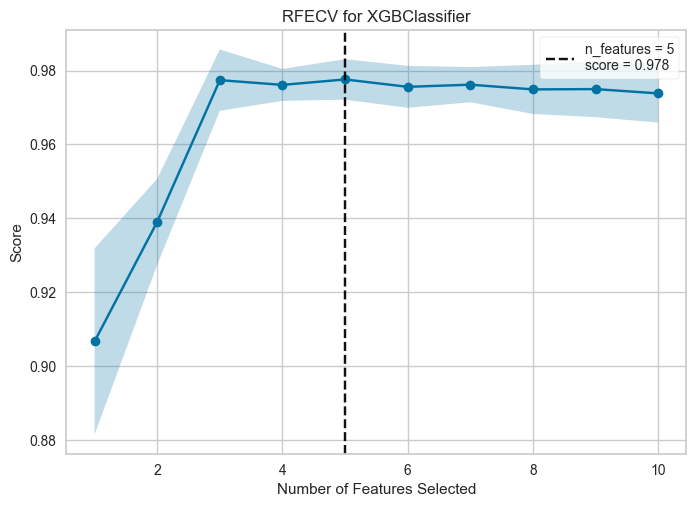

In [29]:
%time
visualizer.fit(X = X_train, y = y_train)
visualizer.show()
plt.show()

In [30]:
visualizer.ranking_

array([1, 1, 6, 1, 4, 1, 2, 1, 3, 5])

In [31]:
visualizer.support_

array([ True,  True, False,  True, False,  True, False,  True, False,
       False])

In [32]:
X_train.columns[visualizer.support_]

Index(['var_0', 'var_1', 'var_3', 'var_5', 'var_7'], dtype='object')

## 2. Backward Elimination

This method is mainly for linear regression models and the steps are:

a. Fit a Linear Regression and shows all the p-values for the coefficients of the variables.

b. Delete the variable with the highest p-value for its coefficient.

c. Repeat the steps a-b until don't have variables which its p-value for its coefficient is greater than the significance level $(\alpha)$.

## 3. Forward Selection

We start with having no feature in the model. In each iteration, **we keep adding the feature which best improves our model**. 

In [33]:
from sklearn.feature_selection import SequentialFeatureSelector

In [34]:
cv = StratifiedKFold(n_splits = 5)
visualizer = SequentialFeatureSelector(XGBClassifier(n_estimators = 20, max_depth = 3), cv = cv, scoring = 'roc_auc', n_jobs = 4, n_features_to_select = 5)

In [35]:
%time
visualizer.fit(X = X_train, y = y_train)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 3.1 µs


SequentialFeatureSelector(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                          estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, gpu_id=None,
                                                  grow_policy=Non...
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=3, max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  n_estimators=20, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  predictor=None,
                                                  random_state=None, ...),
                          n_features_to_select=5, n_jobs=4, scoring='roc_auc')

In [36]:
X_train.columns[visualizer.get_support()]

Index(['var_0', 'var_1', 'var_5', 'var_6', 'var_7'], dtype='object')

# IV. Embedded Methods

## 1. LASSO

Mainly we train here a model using a $ L_1 $ penalty.

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression(random_state=0, penalty = 'l1', solver='liblinear')

In [39]:
clf.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [40]:
fi = pd.DataFrame(zip(list(X_train.columns), list(clf.coef_[0])))

In [41]:
fi = fi.rename(columns = {0: 'variable', 1: 'importance'})

In [42]:
fi['importance'] = abs(fi['importance'])

In [43]:
fi = fi.sort_values(by = ['importance'], ascending = False)

In [44]:
fi[0: n]

,variable,importance
7,var_7,3.470388
1,var_1,0.970465
6,var_6,0.755429
5,var_5,0.044594
4,var_4,0.031104


In [45]:
lasso_var = list(fi[0: n]['variable'])
lasso_var.sort()

In [46]:
lasso_var

['var_1', 'var_4', 'var_5', 'var_6', 'var_7']

# V. Train and Select

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters = {
    "n_estimators":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    }

In [49]:
clf = GridSearchCV(XGBClassifier(), parameters, scoring = 'roc_auc', refit = False, cv = 5, n_jobs = 4)

In [50]:
%time
clf = clf.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [51]:
report = pd.DataFrame.from_dict(clf.cv_results_)

In [52]:
n_est_opt = report.iloc[report['mean_test_score'].idxmax()]['param_n_estimators']
max_depth_opt = report.iloc[report['mean_test_score'].idxmax()]['param_max_depth']

In [53]:
n_est_opt, max_depth_opt

(80, 2)

In [54]:
clf = XGBClassifier(n_estimators = n_est_opt, max_depth = max_depth_opt)

In [55]:
clf = clf.fit(X_train, y_train)

In [56]:
fi = pd.DataFrame(zip(clf.feature_names_in_, clf.feature_importances_))
fi = fi.rename(columns = {0: 'variable', 1: 'importance'})
fi['importance'] = round(fi['importance']*100, 2)
fi = fi.sort_values(by = ['importance'], ascending = False)

In [57]:
fi[0: n]

,variable,importance
7,var_7,43.669998
3,var_3,18.040001
5,var_5,8.420000
1,var_1,7.820000
4,var_4,6.000000


In [58]:
ts_var = list(fi[0: n]['variable'])
ts_var.sort()

In [59]:
ts_var

['var_1', 'var_3', 'var_4', 'var_5', 'var_7']